<a href="https://colab.research.google.com/github/AdityaPatidaroo7/Aditya-/blob/main/Neurance_ai_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#loading the data
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [3]:
# Checking the features
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [4]:
df.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428
32164,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,8.205393


In [5]:
# Checking the information about data types, rangeindex and non-null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [6]:
# check for missing values
df.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [7]:
# Checked the summary of the continuous data
df[['effectiveness_rating','number_of_times_prescribed','base_score']].describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


In [8]:
# Check for catagorical data
df[['name_of_drug','use_case_for_drug','review_by_patient']].describe()

,name_of_drug,use_case_for_drug,review_by_patient
count,32165,32165,32165
unique,2220,636,30121
top,Levonorgestrel,Birth Control,"""Good"""
freq,724,5795,8


In [9]:
# Checking the unique values of drugs names of top 10.
use_case_for_drug = df["name_of_drug"].value_counts().sort_values(ascending=False)
use_case_for_drug=pd.DataFrame(use_case_for_drug[:10]).reset_index()
use_case_for_drug

,index,name_of_drug
0,Levonorgestrel,724
1,Etonogestrel,628
2,Ethinyl estradiol / norethindrone,547
3,Ethinyl estradiol / norgestimate,425
4,Nexplanon,397
5,Ethinyl estradiol / levonorgestrel,394
6,Phentermine,296
7,Sertraline,281
8,Escitalopram,265
9,Mirena,241


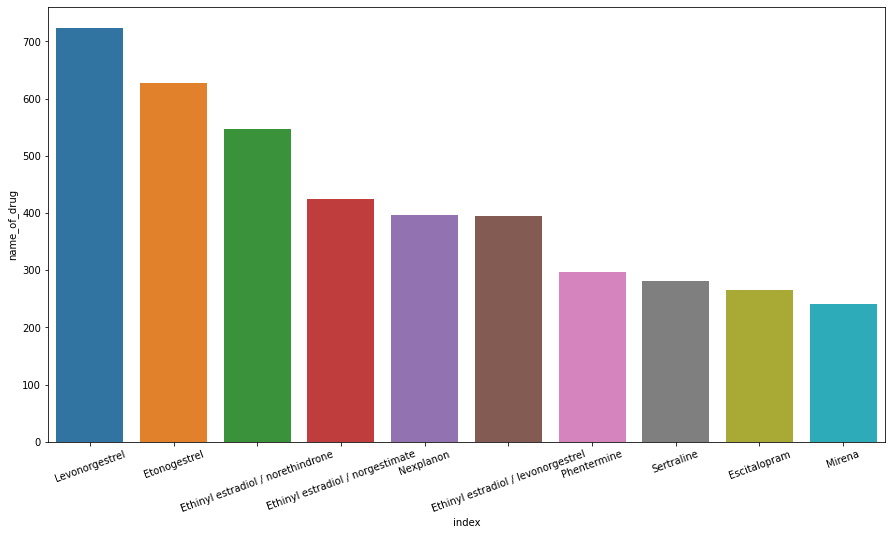

In [10]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.barplot(x='index', y='name_of_drug', data=use_case_for_drug)
plt.xticks(rotation=20)
plt.show()

In [11]:
# analysing top drug
drg_1 = df[df['name_of_drug']=='Levonorgestrel']
drg_1

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
79,130586,Levonorgestrel,Birth Control,"""I have had my Mirena for three months now. In...",10,1-May-12,2,8.074493
100,165993,Levonorgestrel,Emergency Contraception,"""I always read reviews as I am always paranoid...",10,6-Feb-17,9,8.656797
136,166235,Levonorgestrel,Birth Control,"""I had this inserted today. Due to extremely ...",9,17-Jan-17,2,8.174544
288,129725,Levonorgestrel,Birth Control,"""I was on Skyla for about 2 years and had an o...",6,29-May-15,13,1.632839
317,129147,Levonorgestrel,Emergency Contraception,"""I felt I needed to add one of these, it was t...",10,15-Oct-15,11,7.544493
...,...,...,...,...,...,...,...,...
31957,129627,Levonorgestrel,Emergency Contraception,"""So I had unprotected sex and then I realized ...",1,24-Jun-15,3,7.050087
32100,129470,Levonorgestrel,Emergency Contraception,"""Just thought I&#039;d share since it made me ...",10,16-Aug-15,2,8.074493
32107,129858,Levonorgestrel,Birth Control,"""I got the mirena 3 days ago and I&#039;ve had...",4,25-Apr-15,9,8.494570
32146,130934,Levonorgestrel,Birth Control,"""I had my Mirena in for a year and half and ju...",2,6-Jan-11,3,8.311305


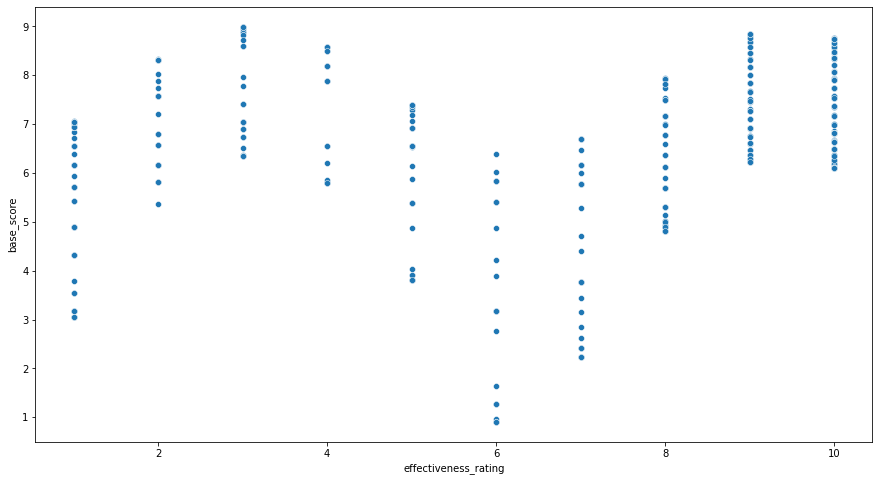

In [12]:
sns.scatterplot(x = "effectiveness_rating", y="base_score",data=drg_1)

In [13]:
 df['review_by_patient'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [14]:
a = df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug').agg('mean').reset_index()
a = a.sort_values(['effectiveness_rating', 'base_score'],ascending= False)
a

,name_of_drug,effectiveness_rating,base_score
268,Benzoic acid / salicylic acid,10.0,8.757201
408,Chaparral,10.0,8.757201
450,CitraNatal 90 DHA,10.0,8.757201
349,Calan,10.0,8.756849
2154,Xolegel,10.0,8.756849
...,...,...,...
1754,Romidepsin,1.0,3.054420
1982,Toujeo Solostar,1.0,3.054420
2029,Tums Smoothies,1.0,3.054420
2077,Vandazole,1.0,3.054420


In [15]:
a.value_counts()

name_of_drug                          effectiveness_rating  base_score
Abacavir / dolutegravir / lamivudine  8.857143              5.908076      1
Onfi                                  8.000000              6.358312      1
Omnaris                               8.000000              3.504191      1
Omnicef                               3.000000              6.838803      1
Omnitrope                             10.000000             8.745991      1
                                                                         ..
Ephedrine / guaifenesin               8.000000              7.893476      1
Epclusa                               7.818182              7.113168      1
Enzalutamide                          1.000000              7.050087      1
Entyvio                               3.500000              7.618344      1
ella                                  7.200000              6.427585      1
Length: 2220, dtype: int64

In [16]:
# Analysing the drug name and efective rating with groupby
b = pd.DataFrame(df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug')['effectiveness_rating'].apply(set)).reset_index()
b

,name_of_drug,effectiveness_rating
0,Abacavir / dolutegravir / lamivudine,"{10, 5, 7}"
1,Abatacept,{10}
2,Abilify,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}"
3,Abilify Discmelt,{8}
4,Abiraterone,{10}
...,...,...
2215,Zyprexa,"{1, 2, 3, 6, 7, 8, 9, 10}"
2216,Zyprexa Intramuscular,{8}
2217,Zyrtec,"{1, 3, 5, 7, 9, 10}"
2218,Zyvox,"{9, 10, 5}"


In [21]:
c = pd.DataFrame(df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug')['effectiveness_rating'].apply(list)).reset_index()
c

,name_of_drug,effectiveness_rating
0,Abacavir / dolutegravir / lamivudine,"[10, 10, 7, 5, 10, 10, 10]"
1,Abatacept,[10]
2,Abilify,"[5, 7, 9, 5, 1, 10, 9, 8, 1, 9, 2, 5, 9, 10, 9..."
3,Abilify Discmelt,[8]
4,Abiraterone,[10]
...,...,...
2215,Zyprexa,"[2, 8, 3, 8, 1, 6, 10, 8, 10, 10, 10, 9, 10, 3..."
2216,Zyprexa Intramuscular,[8]
2217,Zyrtec,"[9, 10, 1, 10, 10, 9, 7, 10, 1, 7, 1, 10, 9, 3..."
2218,Zyvox,"[9, 9, 10, 5, 10, 10]"


In [25]:
from statistics import mean

In [26]:
b['unique_ratings'] = b['effectiveness_rating'].apply(lambda x: len(x))
b['lst_effectiveness_rating'] = c['effectiveness_rating']
b['unique_lst_ratings'] = c['effectiveness_rating'].apply(lambda x: len(x))
b['avg_lst_ratings'] = c['effectiveness_rating'].apply(lambda x: mean(x))
b

,name_of_drug,effectiveness_rating,unique_ratings,lst_effectiveness_rating,unique_lst_ratings,avg_lst_ratings
0,Abacavir / dolutegravir / lamivudine,"{10, 5, 7}",3,"[10, 10, 7, 5, 10, 10, 10]",7,8.857143
1,Abatacept,{10},1,[10],1,10.000000
2,Abilify,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,"[5, 7, 9, 5, 1, 10, 9, 8, 1, 9, 2, 5, 9, 10, 9...",77,6.259740
3,Abilify Discmelt,{8},1,[8],1,8.000000
4,Abiraterone,{10},1,[10],1,10.000000
...,...,...,...,...,...,...
2215,Zyprexa,"{1, 2, 3, 6, 7, 8, 9, 10}",8,"[2, 8, 3, 8, 1, 6, 10, 8, 10, 10, 10, 9, 10, 3...",28,6.892857
2216,Zyprexa Intramuscular,{8},1,[8],1,8.000000
2217,Zyrtec,"{1, 3, 5, 7, 9, 10}",6,"[9, 10, 1, 10, 10, 9, 7, 10, 1, 7, 1, 10, 9, 3...",16,6.937500
2218,Zyvox,"{9, 10, 5}",3,"[9, 9, 10, 5, 10, 10]",6,8.833333


In [20]:
b['unique_ratings'].value_counts()

1     808
2     355
3     234
4     184
5     146
10    134
6      95
7      91
9      88
8      85
Name: unique_ratings, dtype: int64

**Data** **Preprocessing**






In [3]:
def clean_review(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [5]:
df['clean_review'] = clean_review(df['review_by_patient'])

In [4]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer


In [6]:
# Removing the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['clean_review']

0        side effect take combination bystolic 5 mg fis...
1        son halfway fourth week intuniv became concern...
2        used take another oral contraceptive 21 pill c...
3        suboxone completely turned life around feel he...
4        2nd day 5mg started work rock hard erections h...
                               ...                        
32160    taking cymbalta 15 months first 30mg six month...
32161    nexplanon since dec 27 2016 got first period e...
32162    panic attacks social anxiety starting adolesce...
32163    prozac 4 weeks starting 2 years ago terrible d...
32164    limited improvement 4 months developed bad ras...
Name: clean_review, Length: 32165, dtype: object

In [8]:
 #Removing the word stems using the Snowball Stemmer[STEMMING]
Snow_ball = SnowballStemmer("english")
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [17]:
df['clean_review'] 

0             side effect take combin bystol 5 mg fish oil
1        son halfway fourth week intuniv becam concern ...
2        use take anoth oral contracept 21 pill cycl ha...
3        suboxon complet turn life around feel healthie...
4        2nd day 5mg start work rock hard erect howev e...
                               ...                        
32160    take cymbalta 15 month first 30mg six month la...
32161    nexplanon sinc dec 27 2016 got first period en...
32162    panic attack social anxieti start adolesc powe...
32163    prozac 4 week start 2 year ago terribl depress...
32164    limit improv 4 month develop bad rash md refus...
Name: clean_review, Length: 32165, dtype: object

In [10]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [11]:
df['sentiment'] = sentiment(df['review_by_patient'])

In [12]:
df['sentiment_clean'] = sentiment(df['clean_review'])


In [13]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df['review_clean_ss'] = clean_review(df['clean_review'])
df['sentiment_clean_ss'] = sentiment(df['review_clean_ss'])

In [15]:
df = df.dropna(how="any", axis=0)

In [17]:
#Word count in each review
df['count_word']=df["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df['word_unique_count']=df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['letter_count']=df["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df["punctuation_count"] = df["review_by_patient"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["word_upper_count"] = df["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["title_word_case"] = df["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["stopwards_count"] = df["review_by_patient"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df["len_word_mean"] = df["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [18]:
df.head(2)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,clean_review,sentiment,...,review_clean_ss,sentiment_clean_ss,count_word,word_unique_count,letter_count,punctuation_count,word_upper_count,title_word_case,stopwards_count,len_word_mean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,side effect take combin bystol 5 mg fish oil,0.000000,...,side effect take combin bystol 5 mg fish oil,0.000000,9,9,44,3,1,6,7,4.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,son halfway fourth week intuniv becam concern ...,0.168333,...,son halfway fourth week intuniv becam concern ...,0.114583,66,55,373,23,2,13,69,4.666667


In [19]:
df.corr()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,sentiment,sentiment_clean,sentiment_clean_ss,count_word,word_unique_count,letter_count,punctuation_count,word_upper_count,title_word_case,stopwards_count,len_word_mean
patient_id,1.000000,0.018803,0.017499,0.010924,0.017265,0.004093,0.004093,0.003166,0.002281,0.003341,-0.001753,0.001935,0.008600,0.006647,0.005953
effectiveness_rating,0.018803,1.000000,0.242224,0.412301,0.353804,0.242021,0.242021,0.019697,0.018781,0.019339,-0.002690,0.011001,0.047460,0.026308,-0.000251
number_of_times_prescribed,0.017499,0.242224,1.000000,0.134295,0.101878,0.052821,0.052821,0.026988,0.030976,0.036008,-0.008018,0.022686,0.052514,0.015854,0.058342
base_score,0.010924,0.412301,0.134295,1.000000,0.151597,0.099588,0.099588,-0.001759,-0.000791,-0.000507,-0.008574,0.006631,0.015513,0.002815,0.010046
sentiment,0.017265,0.353804,0.101878,0.151597,1.000000,0.657190,0.657190,-0.114975,-0.118338,-0.112659,-0.087697,-0.080927,-0.075605,-0.103838,0.025451
sentiment_clean,0.004093,0.242021,0.052821,0.099588,0.657190,1.000000,1.000000,-0.099235,-0.100365,-0.099217,-0.075039,-0.070380,-0.060739,-0.081837,0.001361
sentiment_clean_ss,0.004093,0.242021,0.052821,0.099588,0.657190,1.000000,1.000000,-0.099235,-0.100365,-0.099217,-0.075039,-0.070380,-0.060739,-0.081837,0.001361
count_word,0.003166,0.019697,0.026988,-0.001759,-0.114975,-0.099235,-0.099235,1.000000,0.985659,0.992337,0.792822,0.677536,0.804033,0.896583,-0.103257
word_unique_count,0.002281,0.018781,0.030976,-0.000791,-0.118338,-0.100365,-0.100365,0.985659,1.000000,0.981398,0.787042,0.669127,0.790055,0.885520,-0.086992
letter_count,0.003341,0.019339,0.036008,-0.000507,-0.112659,-0.099217,-0.099217,0.992337,0.981398,1.000000,0.777490,0.668359,0.803456,0.892244,-0.005434


In [20]:
df.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'clean_review', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'word_unique_count', 'letter_count', 'punctuation_count',
       'word_upper_count', 'title_word_case', 'stopwards_count',
       'len_word_mean'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['use_case_for_drug']=labelencoder.fit_transform(df['use_case_for_drug'])


Model **Building**

In [25]:
import statsmodels.formula.api as smf 
model = smf.ols('base_score~patient_id + use_case_for_drug + effectiveness_rating + drug_approved_by_UIC + number_of_times_prescribed + sentiment + sentiment_clean + sentiment_clean_ss + count_word + word_unique_count + letter_count + punctuation_count + word_upper_count + title_word_case + stopwards_count + len_word_mean',data = df).fit()

In [28]:
model1 = smf.ols('base_score~patient_id + use_case_for_drug + effectiveness_rating + number_of_times_prescribed + sentiment + sentiment_clean + sentiment_clean_ss + count_word + word_unique_count + letter_count + punctuation_count + word_upper_count + title_word_case + stopwards_count + len_word_mean',data = df).fit()

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     476.4
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:53:56   Log-Likelihood:                -57495.
No. Observations:               32163   AIC:                         1.150e+05
Df Residuals:                   32148   BIC:                         1.151e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.2603      0.154     34.115      0.000       4.958       5.563
patient_id                  5.838e-08    1.2e-07      0.486      0.627   -1.77e-07    2.94e-07
use_case_for_drug             -0.0001   4.69e-05     -2.325      0.020      -0.000   -1.72e-05
effectiveness_rating           0.1955      0.003     72.094      0.000       0.190       0.201
number_of_times_prescribed     0.0016      0.000      6.974      0.000       0.001       0.002
sentiment                      0.0614      0.050      1.219      0.223      -0.037       0.160
sentiment_clean               -0.0215      0.024     -0.903      0.366      -0.068       0.025
sentiment_clean_ss            -0.0215      0.024     -0.903      0.366      -0.068       0.025
count_word                    -0.0064      0.005     -1.296      0.195      -0.016       0.003
word_unique_count              0.0025      0.003      0.929      0.353      -0.003       0.008
letter_count                   0.0006      0.001      0.717      0.473      -0.001       0.002
punctuation_count              0.0004      0.001      0.333      0.739      -0.002       0.003
word_upper_count               0.0077      0.003      2.262      0.024       0.001       0.014
title_word_case               -0.0007      0.003     -0.252      0.801      -0.006       0.005
stopwards_count               -0.0007      0.001     -0.710      0.478      -0.003       0.001
len_word_mean                  0.0079      0.031      0.251      0.802      -0.054       0.069
==============================================================================
Omnibus:                     2977.256   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4194.444
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       3.952   Cond. No.                     3.35e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_score   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.077
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:51:39   Log-Likelihood:                -55326.
No. Observations:               32163   AIC:                         1.178e+05
Df Residuals:                   28612   BIC:                         1.475e+05
Df Model:                        3550                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             5.1129      0.505     10.124      0.000       4.123       6.103
drug_approved_by_UIC[T.1-Apr-09]      0.0816      0.800      0.102      0.919      -1.485       1.649
drug_approved_by_UIC[T.1-Apr-10]      1.6266      1.120      1.452      0.147      -0.570       3.823
drug_approved_by_UIC[T.1-Apr-11]     -0.7065      0.956     -0.739      0.460      -2.580       1.167
drug_approved_by_UIC[T.1-Apr-12]      0.7443      0.722      1.031      0.303      -0.671       2.160
drug_approved_by_UIC[T.1-Apr-13]      0.5010      0.861      0.582      0.561      -1.188       2.190
drug_approved_by_UIC[T.1-Apr-14]      0.6730      0.756      0.891      0.373      -0.808       2.154
drug_approved_by_UIC[T.1-Apr-15]      1.4953      0.659      2.271      0.023       0.205       2.786
drug_approved_by_UIC[T.1-Apr-16]      0.5049      0.557      0.906      0.365      -0.588       1.598
drug_approved_by_UIC[T.1-Apr-17]      0.4788      0.564      0.849      0.396      -0.626       1.584
drug_approved_by_UIC[T.1-Aug-08]      1.1913      1.511      0.789      0.430      -1.770       4.152
drug_approved_by_UIC[T.1-Aug-09]     -0.2472      0.955     -0.259      0.796      -2.120       1.625
drug_approved_by_UIC[T.1-Aug-10]      0.6492      1.120      0.579      0.562      -1.547       2.845
drug_approved_by_UIC[T.1-Aug-11]     -1.1798      0.800     -1.475      0.140      -2.747       0.388
drug_approved_by_UIC[T.1-Aug-12]      0.5300      0.861      0.615      0.538      -1.158       2.218
drug_approved_by_UIC[T.1-Aug-13]      0.2849      0.697      0.409      0.683      -1.080       1.650
drug_approved_by_UIC[T.1-Aug-14]      0.7143      0.861      0.829      0.407      -0.974       2.403
drug_approved_by_UIC[T.1-Aug-15]     -0.0004      0.645     -0.001      1.000      -1.264       1.263
drug_approved_by_UIC[T.1-Aug-16]      0.8662      0.605      1.432      0.152      -0.319       2.051
drug_approved_by_UIC[T.1-Aug-17]     -0.4506      0.576     -0.783      0.434      -1.579       0.678
drug_approved_by_UIC[T.1-Dec-08]     -0.0464      1.120     -0.041      0.967      -2.243       2.150
drug_approved_by_UIC[T.1-Dec-09]      0.7598      0.632      1.202      0.229      -0.479       1.999
drug_approved_by_UIC[T.1-Dec-10]      1.6244      0.956      1.700      0.089      -0.248       3.497
drug_approved_by_UIC[T.1-Dec-11]     -0.3071      0.799     -0.384      0.701      -1.874       1.260
drug_approved_by_UIC[T.1-Dec-12]      0.5918      0.956      0.619      0.536      -1.281       2.465
drug_approved_by_UIC[T.1-Dec-13]      0.3601      0.756      0.477      0.634      -1.121       1.841
drug_approved_by_UIC[T.1-Dec-14]     -0.3063      0.622     -0.493      0.622      -1.525       0.912
drug_approved_by_UIC[T.